**Dataset de origem**: [https://archive.ics.uci.edu/ml/datasets/wine+quality/](https://archive.ics.uci.edu/ml/datasets/wine+quality/)

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

## **Baixando o Conjunto de Dados**

In [2]:
!wget https://raw.githubusercontent.com/ander-oliveira/Estudos-em-IA/main/IV.%20Regressão%20Linear/I.%20Qualidade%20de%20Vinhos/winequality/wine_quality_red.csv

--2021-09-05 22:30:57--  https://raw.githubusercontent.com/ander-oliveira/Estudos-em-IA/main/IV.%20Regress%C3%A3o%20Linear/I.%20Qualidade%20de%20Vinhos/winequality/wine_quality_red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84196 (82K) [text/plain]
Saving to: ‘wine_quality_red.csv’

wine_quality_red.cs 100%[===================>]  82.22K  --.-KB/s    in 0.02s   

2021-09-05 22:30:58 (4.94 MB/s) - ‘wine_quality_red.csv’ saved [84196/84196]



## **Importando o conjunto de dados para um Dataframe (Pandas)**

In [3]:
# Cria um dataset chamado 'df' que receberá os dados do csv
df = pd.read_csv("wine_quality_red.csv")

#EXIBE A ESTRUTURA DO DATAFRAME
print(df.head())

   fixed_acidity  volatile_acidity  citric_acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


## **Resumo do conjunto de dados**

In [4]:
print(df.describe())

       fixed_acidity  volatile_acidity  ...    sulphates      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...     0.658149     5.636023
std         1.741096          0.179060  ...     0.169507     0.807569
min         4.600000          0.120000  ...     0.330000     3.000000
25%         7.100000          0.390000  ...     0.550000     5.000000
50%         7.900000          0.520000  ...     0.620000     6.000000
75%         9.200000          0.640000  ...     0.730000     6.000000
max        15.900000          1.580000  ...     2.000000     8.000000

[8 rows x 11 columns]


## **Selecionando apenas as features Acidez Fixa e Qualidade**

In [5]:
acidez_fixa = df[['fixed_acidity']]
qualidade = df['quality']
print(acidez_fixa.head())

   fixed_acidity
0            7.4
1            7.8
2            7.8
3           11.2
4            7.4


## **Divisão do dataset em dados de treinamento e dados de teste**

In [6]:
acidez_treino, acidez_test, qualidade_treino, qualidade_teste = train_test_split(acidez_fixa, qualidade, test_size=0.2, random_state=42)
print(type(acidez_treino))

<class 'pandas.core.frame.DataFrame'>


## **Exibindo a correlação entre as features do dataset de treinamento**

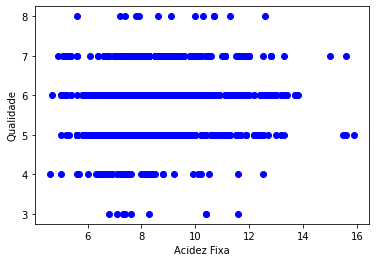

In [7]:
plt.scatter(acidez_treino, qualidade_treino, color='blue')
plt.xlabel("Acidez Fixa")
plt.ylabel("Qualidade")
plt.show()

## **Treinando o modelo de regressão linear**

In [8]:
# CRIAR UM MODELO DE TIPO DE REGRESSÃO LINEAR
modelo =  linear_model.LinearRegression()

# TREINAR O MODELO USANDO O DATASET DE TESTE
# PARA ENCONTRAR O VALOR DE A E B (Y = A + B.X)
modelo.fit(acidez_treino, qualidade_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Exibir os coeficientes (A e B)**

In [9]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)

(A) Intercepto:  5.146795594565525
(B) Inclinação:  [0.05732185]


## **Vamos exibir a nossa reta de regressão no dataset de treino**

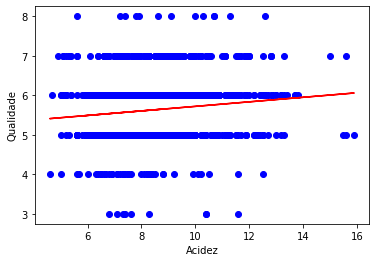

In [12]:
plt.scatter(acidez_treino, qualidade_treino, color='blue')
plt.plot(acidez_treino, modelo.coef_[0]*acidez_treino + modelo.intercept_, '-r')
plt.ylabel("Qualidade")
plt.xlabel("Acidez")
plt.show()

## **Vamos executar o nosso modelo no dataset de teste**

In [13]:
#Primeiro a gente tem que fazer as predições usando o modelo e base de teste
predicoesQualidade = modelo.predict(acidez_test)

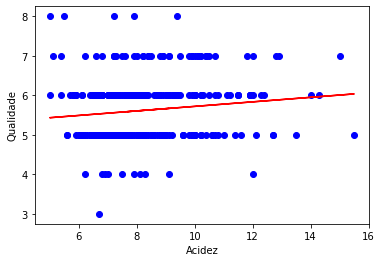

In [14]:
plt.scatter(acidez_test, qualidade_teste, color='blue')
plt.plot(acidez_test, modelo.coef_[0]*acidez_test + modelo.intercept_, '-r')
plt.ylabel("Qualidade")
plt.xlabel("Acidez")
plt.show()

## **Vamos avaliar o modelo**

In [15]:
#Agora é mostrar as métricas
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesQualidade - qualidade_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(qualidade_teste, predicoesQualidade))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(qualidade_teste, predicoesQualidade))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(qualidade_teste, predicoesQualidade)))
print("R2-score: %.2f" % r2_score(predicoesQualidade , qualidade_teste) )

Soma dos Erros ao Quadrado (SSE): 207 
Erro Quadrático Médio (MSE): 0.65
Erro Médio Absoluto (MAE): 0.67
Raiz do Erro Quadrático Médio (RMSE): 0.80 
R2-score: -59.24
